In [2]:
# Import necessary libraries
import yfinance as yf
import pandas as pd

# Create a ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")

# Extract stock data and save it in a DataFrame
tesla_data = tesla_ticker.history(period="max")

# Reset the index to turn the Date index into a column
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data DataFrame
print(tesla_data.head())



                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [4]:
# Import necessary libraries for web scraping
import requests
from bs4 import BeautifulSoup

# URL to scrape Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Use requests to download the webpage content
response = requests.get(url)
html_data = response.text

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data, 'html5lib')

# Extract the table with Tesla Revenue data using read_html
tesla_revenue = pd.read_html(html_data, match="Tesla Quarterly Revenue")[0]

# Rename columns for clarity
tesla_revenue.columns = ["Date", "Revenue"]

# Clean the Revenue column by removing commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', '', regex=True)

# Drop rows with missing values and ensure all data is cleaned
tesla_revenue.dropna(inplace=True)

# Display the last five rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())




          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [5]:
# Import necessary libraries
import yfinance as yf
import pandas as pd

# Create a ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Extract stock data and save it in a DataFrame
gme_data = gme_ticker.history(period="max")

# Reset the index to turn the Date index into a column
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())




                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [6]:
# Import necessary libraries for web scraping
import requests
from bs4 import BeautifulSoup

# URL to scrape GameStop revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Use requests to download the webpage content
response = requests.get(url)
html_data_2 = response.text

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html5lib')

# Extract the table with GameStop Revenue data using read_html
gme_revenue = pd.read_html(html_data_2, match="GameStop Quarterly Revenue")[0]

# Rename columns for clarity
gme_revenue.columns = ["Date", "Revenue"]

# Clean the Revenue column by removing commas and dollar signs
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', '', regex=True)

# Drop rows with missing values and ensure all data is cleaned
gme_revenue.dropna(inplace=True)

# Display the last five rows of the gme_revenue DataFrame
print(gme_revenue.tail())




          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


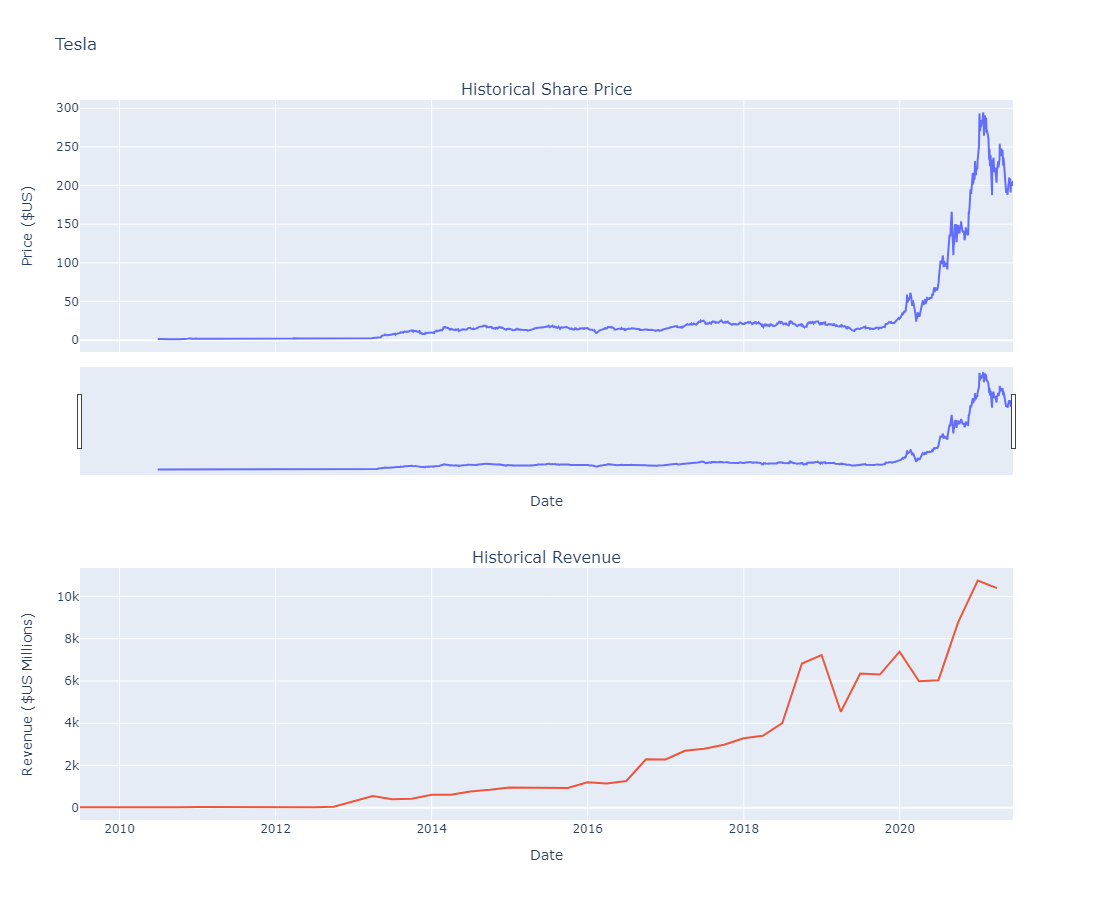

In [8]:
# Importing necessary libraries
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    """
    Displays a graph of the stock data

    Arguments:
    stock_data -- DataFrame, msut contain Date and Close columns
    revenue -- DataFrame, msut contain Date and Revenue columns
    stock -- name of stock
    """
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
# Example usage with Tesla data
make_graph(tesla_data, tesla_revenue, 'Tesla')



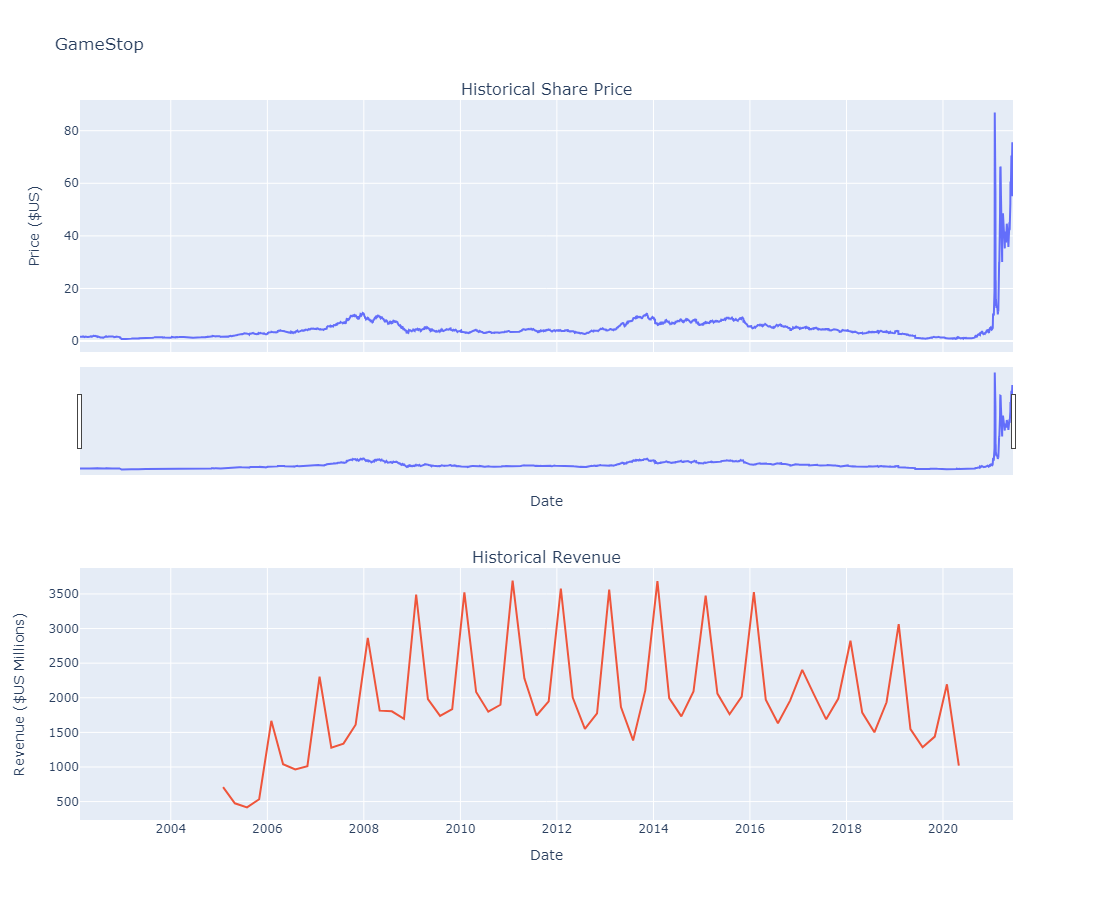

In [9]:
# Use the make_graph function to plot GameStop stock data and revenue
make_graph(gme_data, gme_revenue, 'GameStop')
